In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 

warnings.filterwarnings("ignore")

In [2]:
os.chdir("..")
from pipeline.preprocesamiento import obtener_datos_bcrp

In [3]:
from pipeline.config import SERIE_ORO, RUTA_ORO, SERIE_AFP, SERIE_TC, RUTA_AFP, RUTA_TC
from pipeline.preprocesamiento import limpiar_datos_bcrp
df_oro = obtener_datos_bcrp(SERIE_ORO)
df_afp = obtener_datos_bcrp(SERIE_AFP)
df_tc = obtener_datos_bcrp(SERIE_TC)
limpiar_datos_bcrp(df_oro, False, False, RUTA_ORO) 
limpiar_datos_bcrp(df_afp, True, False, RUTA_AFP)
limpiar_datos_bcrp(df_tc, False, True, RUTA_TC)

,periodo,valor,periodo_limpio,valor_limpio
0,18.Mar.25,3.633,2025-03-18,3.633
1,19.Mar.25,3.616,2025-03-19,3.616
2,20.Mar.25,3.62,2025-03-20,3.620
3,21.Mar.25,3.628,2025-03-21,3.628
4,24.Mar.25,3.635,2025-03-24,3.635
5,25.Mar.25,3.634,2025-03-25,3.634
6,26.Mar.25,3.636,2025-03-26,3.636
7,27.Mar.25,3.642,2025-03-27,3.642
8,28.Mar.25,3.647,2025-03-28,3.647
9,31.Mar.25,3.66,2025-03-31,3.660


In [4]:
# Analizar datos

df_oro = pd.read_csv(RUTA_ORO)
df_afp = pd.read_csv(RUTA_AFP)
df_tc = pd.read_csv(RUTA_TC)

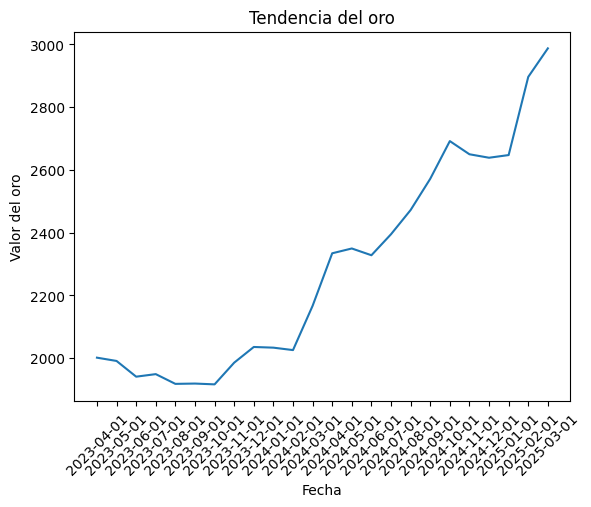

In [5]:
# Analizar la tendencia del oro

sns.lineplot(df_oro, x = "periodo_limpio", y= "valor_limpio")
plt.title("Tendencia del oro")
plt.xlabel("Fecha")
plt.ylabel("Valor del oro")
plt.xticks(rotation=45)
plt.show()

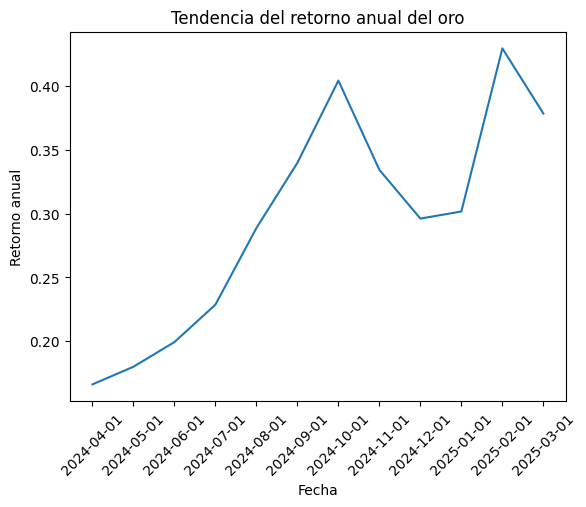

In [6]:
# Calcular el porcentaje de retorno anual

df_oro["retorno_anual"] = df_oro["valor_limpio"].pct_change(periods=12) 


sns.lineplot(
    df_oro[df_oro["retorno_anual"].isna() == False],
    x = "periodo_limpio",
    y= "retorno_anual",
)

plt.title("Tendencia del retorno anual del oro")
plt.xlabel("Fecha")
plt.ylabel("Retorno anual")
plt.xticks(rotation=45)
plt.show()

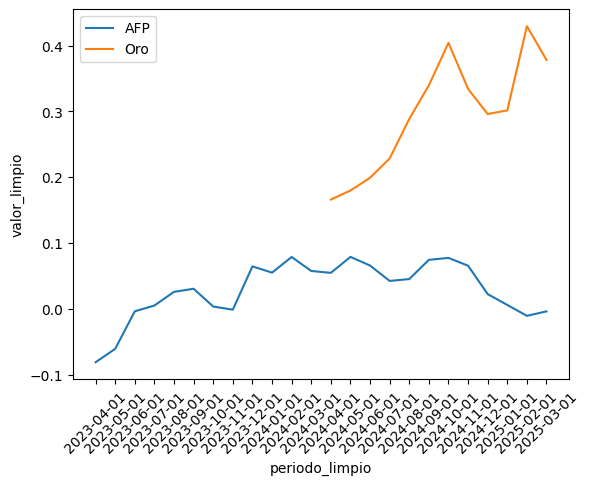

In [7]:

sns.lineplot(
    df_afp, 
    x = "periodo_limpio", 
    y= "valor_limpio",
    label = "AFP")
sns.lineplot(
    df_oro[df_oro["retorno_anual"].isna() == False],
    x = "periodo_limpio",
    y= "retorno_anual",
    label = "Oro",
)

#plt.title("Tendencia de los fondos de pensiones")
#plt.xlabel("Fecha")
#plt.ylabel("Valor de los fondos de pensiones")
plt.xticks(rotation=45)
plt.show()

In [18]:
df_spy = pd.read_csv("data/raw/spy500.csv", sep = ";", parse_dates=["periodo"])
## Calcular promedio mensual
# Convertir la columna "periodo" a tipo datetime

df_spy["periodo"] = pd.to_datetime(df_spy["periodo"], format="%d/%m/%Y")

df_spy_final = (
    df_spy
    .groupby(df_spy["periodo"].dt.to_period("M"))
    .mean(numeric_only=True)
    .reset_index(names="periodo_clean")
)
df_spy_final["periodo_clean"] = df_spy_final["periodo_clean"].dt.to_timestamp()
# Convertir "periodo_clean" a primer día del mes
df_spy_final["periodo_clean"] = pd.to_datetime(df_spy_final["periodo_clean"]).values.astype('datetime64[M]')

# Calcular el retorno anual
df_spy_final["retorno_anual"] = df_spy_final["valor SPY"].pct_change(periods=12)
df_spy_final["periodo_limpio"] = df_spy_final["periodo_clean"].astype(str)

In [ ]:
df_amazon_raw = pd.read_csv("data/raw/amazon.csv", sep=";")
print(df_amazon_raw.columns)  
df_amazon_raw.head()          

Index(['periodo', 'valor Amazon'], dtype='object')


,periodo,valor Amazon
0,02/05/2025,"189,98"
1,01/05/2025,"190,20"
2,30/04/2025,"184,42"
3,29/04/2025,"187,39"
4,28/04/2025,"187,70"


In [14]:
# Cargar datos de Amazon
df_amazon = pd.read_csv("data/raw/amazon.csv", sep=";", parse_dates=["periodo"])
df_amazon["valor Amazon"] = df_amazon["valor Amazon"].str.replace(",", ".").astype(float)
# Asegurar que la columna "periodo" sea datetime
df_amazon["periodo"] = pd.to_datetime(df_amazon["periodo"], format="%d/%m/%Y")

# Calcular promedio mensual
df_amazon_final = (
    df_amazon
    .groupby(df_amazon["periodo"].dt.to_period("M"))
    .mean(numeric_only=True)
    .reset_index(names="periodo_clean")
)

# Limpiar y ajustar columnas
df_amazon_final["periodo_clean"] = df_amazon_final["periodo_clean"].dt.to_timestamp()
df_amazon_final["periodo_clean"] = pd.to_datetime(df_amazon_final["periodo_clean"]).values.astype('datetime64[M]')

# Calcular retorno anual
df_amazon_final["retorno_anual"] = df_amazon_final["valor Amazon"].pct_change(periods=12)
df_amazon_final["periodo_limpio"] = df_amazon_final["periodo_clean"].astype(str)



In [19]:
df_afp.rename(columns = {"valor_limpio": "valor_afp"}, inplace = True)
df_oro.rename(columns = {"retorno_anual": "retorno_oro"}, inplace = True)
df_spy_final.rename(columns = {"retorno_anual": "retorno_spy"}, inplace = True)
df_amazon_final.rename(columns={"retorno_anual": "retorno_amazon"}, inplace=True)

In [22]:
df_final = df_spy_final.merge(df_afp, how = "left", on = "periodo_limpio").merge(df_oro, how = "left", on = "periodo_limpio").merge(df_amazon_final, how = "left", on = "periodo_limpio")

df_final[df_final["periodo_limpio"]> "2023-03-01"]

,periodo_clean_x,valor SPY,retorno_spy,periodo_limpio,valor_afp,valor_limpio,retorno_oro,periodo_clean_y,valor Amazon,retorno_amazon
39,2023-04-01,399.964836,-0.045540,2023-04-01,-0.081139,2001.641000,NaN,2023-04-01,103.341579,-0.317019
40,2023-05-01,402.845768,0.043514,2023-05-01,-0.060815,1991.180000,NaN,2023-05-01,111.939545,-0.004750
41,2023-06-01,422.873409,0.133247,2023-06-01,-0.003715,1941.100000,NaN,2023-06-01,126.380476,0.114770
42,2023-07-01,439.093948,0.171341,2023-07-01,0.005038,1949.201429,NaN,2023-07-01,130.818000,0.117744
43,2023-08-01,434.664224,0.089281,2023-08-01,0.025844,1918.166957,NaN,2023-08-01,135.502174,-0.014096
44,2023-09-01,430.615297,0.163455,2023-09-01,0.030557,1919.154762,NaN,2023-09-01,135.440000,0.099227
45,2023-10-01,417.313976,0.163631,2023-10-01,0.003498,1916.590909,NaN,2023-10-01,128.278636,0.120724
46,2023-11-01,436.525930,0.156341,2023-11-01,-0.001230,1985.710455,NaN,2023-11-01,143.457619,0.526988
47,2023-12-01,459.232980,0.216185,2023-12-01,0.064577,2035.706190,NaN,2023-12-01,149.824000,0.703762
48,2024-01-01,471.329035,0.231551,2024-01-01,0.055047,2033.532174,NaN,2024-01-01,153.615238,0.630328


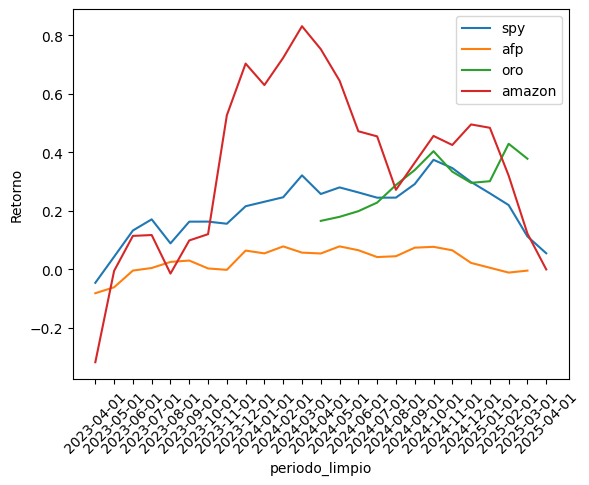

In [23]:
sns.lineplot(
    df_final[df_final["periodo_limpio"]> "2023-03-01"], 
    x = "periodo_limpio", 
    y= "retorno_spy",
    label = "spy")
sns.lineplot(
    df_final[df_final["periodo_limpio"]> "2023-03-01"], 
    x = "periodo_limpio", 
    y= "valor_afp",
    label = "afp")

sns.lineplot(
    df_final[df_final["periodo_limpio"]> "2023-03-01"], 
    x = "periodo_limpio", 
    y= "retorno_oro",
    label = "oro")

sns.lineplot(
    df_final[df_final["periodo_limpio"] > "2023-03-01"], 
    x = "periodo_limpio", 
    y = "retorno_amazon",
    label = "amazon")
#plt.title("Tendencia de los fondos de pensiones")
#plt.xlabel("Fecha")
plt.ylabel("Retorno")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_oro.dtypes